# Prediction of Salary and Placement Status

Importing necessary libraries

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Wrangling
Loading the Dataset

In [63]:
df = pd.read_csv("Salary and Placement Data.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Now we infer the data to check its datatypes

In [64]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

#  Checking for Null values
Now we check for missing values

In [65]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

From the above we can conclude that there are 67 missing/Null values in the 'salary' column which need to be dealt with

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


# Dealing with missing values

Now we will replace all null values with 0 as they aren't placed and hence their salary is 0

In [67]:
df['salary'] = df['salary'].fillna(0)
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [68]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

# Data Cleaning
Now the 'sl_no' column is dropped as it is not relevant in the predictions

In [69]:
df = df.drop(['sl_no'],axis=1)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Now we check the unique values in each column to get a rough idea about encoding.

In [70]:
uniqueValues = df. nunique()
uniqueValues

gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             46
dtype: int64

We will encode it according to the data in each column.

In [71]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
onehotencoder = OneHotEncoder()
df['gender'] = labelencoder.fit_transform(df['gender'])
df['ssc_b'] = labelencoder.fit_transform(df['ssc_b'])
df['hsc_b'] = labelencoder.fit_transform(df['hsc_b'])
df['hsc_s'] = labelencoder.fit_transform(df['hsc_s'])
df['degree_t'] = labelencoder.fit_transform(df['degree_t'])
df['workex'] = labelencoder.fit_transform(df['workex'])
df['specialisation'] = labelencoder.fit_transform(df['specialisation'])
df['status'] = labelencoder.fit_transform(df['status'])

In [72]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [73]:
df.dtypes

gender              int32
ssc_p             float64
ssc_b               int32
hsc_p             float64
hsc_b               int32
hsc_s               int32
degree_p          float64
degree_t            int32
workex              int32
etest_p           float64
specialisation      int32
mba_p             float64
status              int32
salary            float64
dtype: object

In [74]:
enc = pd.DataFrame(onehotencoder.fit_transform(df[['hsc_s']]).toarray())

In [75]:
enc

,0,1,2
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
210,0.0,1.0,0.0
211,0.0,0.0,1.0
212,0.0,1.0,0.0
213,0.0,1.0,0.0


In [76]:
enc1 = pd.DataFrame(onehotencoder.fit_transform(df[['degree_t']]).toarray())

In [77]:
enc1

,0,1,2
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
...,...,...,...
210,1.0,0.0,0.0
211,0.0,0.0,1.0
212,1.0,0.0,0.0
213,1.0,0.0,0.0


In [78]:
df = df.join(enc)

In [79]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,0,1,2
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0,0.0,1.0,0.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,0.0,0.0,1.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0,1.0,0.0,0.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0,0.0,0.0,1.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0,0.0,1.0,0.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0,0.0,0.0,1.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0,0.0,1.0,0.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0,0.0,1.0,0.0


In [80]:
df.dtypes

gender              int32
ssc_p             float64
ssc_b               int32
hsc_p             float64
hsc_b               int32
hsc_s               int32
degree_p          float64
degree_t            int32
workex              int32
etest_p           float64
specialisation      int32
mba_p             float64
status              int32
salary            float64
0                 float64
1                 float64
2                 float64
dtype: object

In [81]:
df = df.rename(columns={0:'hsc_s1',1:'hsc_s2',2:'hsc_s3'})

In [82]:
df = df.join(enc1)

In [83]:
df = df.rename(columns={0:'degree_t1',1:'degree_t2',2:'degree_t3'})

In [84]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,hsc_s1,hsc_s2,hsc_s3,degree_t1,degree_t2,degree_t3
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0,0.0,1.0,0.0,1.0,0.0,0.0


In [85]:
df=df.drop(['hsc_s'],axis=1)
df=df.drop(['degree_t'],axis=1)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s1,hsc_s2,hsc_s3,degree_t1,degree_t2,degree_t3
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,270000.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,200000.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,250000.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,425000.0,0.0,1.0,0.0,1.0,0.0,0.0


Variable Identification

In [86]:
x1=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,12,13,14,15,16,17]] #independent variable for status prediction
y1=df.iloc[:,10] #dependent variable for status prediction
x2=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17]] #independent variable for salary prediction
y2=df.iloc[:,11] #dependent variable for salary prediction

To select the set of best features, we conduct a score test which tells us about which feature is most influential in prediction. The ones with a very low score can be droped and hence the data will be cleaned.

In [87]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
y1=pd.DataFrame(y1)
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(x1,y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x1.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(16,'Score'))  #print 10 best features

             Specs       Score
1            ssc_p  137.739258
3            hsc_p   92.449312
5         degree_p   40.204896
6           workex   10.745484
7          etest_p    8.522679
8   specialisation    7.539357
14       degree_t2    2.803632
10          hsc_s1    1.047380
9            mba_p    0.691857
0           gender    0.624805
2            ssc_b    0.161359
13       degree_t1    0.153635
11          hsc_s2    0.060795
4            hsc_b    0.024118
15       degree_t3    0.011775
12          hsc_s3    0.006571


On looking at the scores, we might think to drop degree_t3 and hsc_s3 but since these are a choice of type of education and might be possible that less people opt for it but this might be useful for our prediction 

In [88]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
y2=pd.DataFrame(y2)
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(x2,y2)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x2.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(17,'Score'))  #print 10 best features

             Specs       Score
1            ssc_p  207.960272
3            hsc_p  156.210981
7          etest_p  146.201656
5         degree_p   74.286584
10          status   67.000000
11          hsc_s1   48.434035
6           workex   37.830137
9            mba_p   37.647591
16       degree_t3   32.672882
13          hsc_s3   26.413137
8   specialisation   25.828472
2            ssc_b   24.751845
12          hsc_s2   22.627679
4            hsc_b   17.331015
0           gender   16.988182
15       degree_t2   15.809657
14       degree_t1   15.474561


We can see that all of the data is really important to us because dependency on each and every feature is very high for prediction 

# Data Visualization

SCATTER PLOT FOR SALARY 

Text(0.5, 1.0, 'ssc_p vs salary')

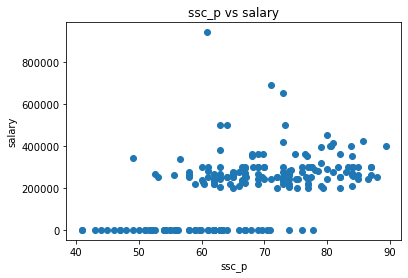

In [89]:

plt.scatter(x=df['ssc_p'],y=df['salary'])
plt.xlabel('ssc_p')
plt.ylabel('salary')
plt.title('ssc_p vs salary')

Text(0.5, 1.0, 'hsc_p vs salary')

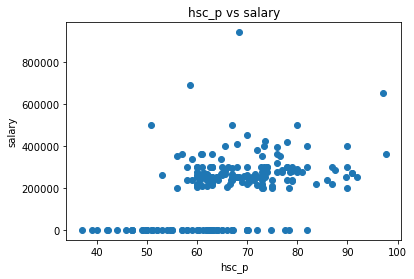

In [90]:
plt.scatter(x=df['hsc_p'],y=df['salary'])
plt.xlabel('hsc_p')
plt.ylabel('salary')
plt.title('hsc_p vs salary')

Text(0.5, 1.0, 'degree_p vs salary')

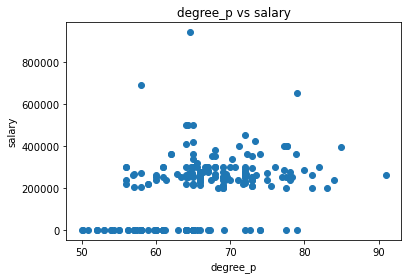

In [91]:
plt.scatter(x=df['degree_p'],y=df['salary'])
plt.xlabel('degree_p')
plt.ylabel('salary')
plt.title('degree_p vs salary')

Text(0.5, 1.0, 'mba_p vs salary')

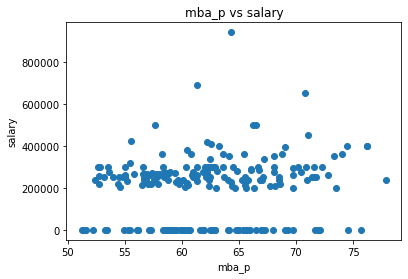

In [92]:
plt.scatter(x=df['mba_p'],y=df['salary'])
plt.xlabel('mba_p')
plt.ylabel('salary')
plt.title('mba_p vs salary')

Text(0.5, 1.0, 'etest_p vs salary')

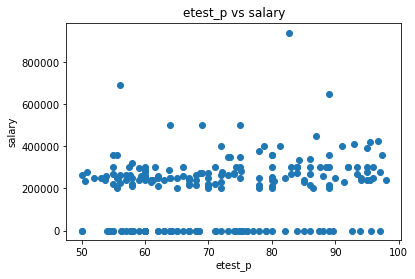

In [93]:
plt.scatter(x=df['etest_p'],y=df['salary'])
plt.xlabel('etest_p')
plt.ylabel('salary')
plt.title('etest_p vs salary')

SCATTER PLOTS FOR STATUS

<AxesSubplot:>

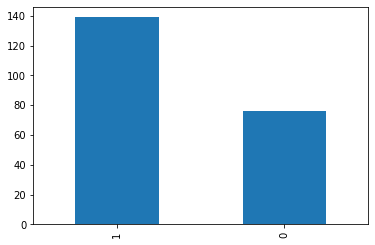

In [94]:
df['gender'].value_counts().plot.bar()

<AxesSubplot:>

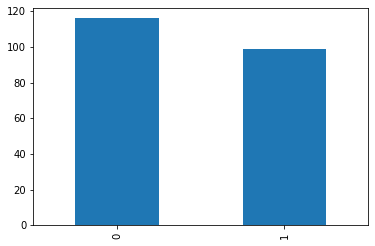

In [95]:
df['ssc_b'].value_counts().plot.bar()

<AxesSubplot:>

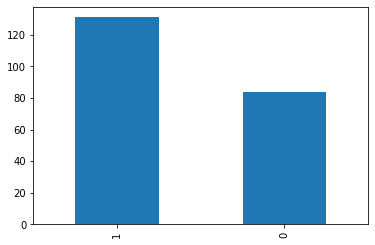

In [96]:
df['hsc_b'].value_counts().plot.bar()

<AxesSubplot:>

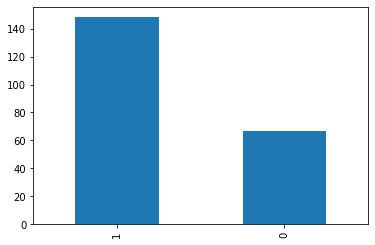

In [97]:
df['status'].value_counts().plot.bar()

# Splitting the Data into train and test sets

In [98]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.20, random_state = 102529)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.20, random_state = 102529)

# Scaling the data

In [99]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train1=sc_x.fit_transform(x_train1)
x_test1=sc_x.transform(x_test1)

In [100]:
from sklearn.preprocessing import StandardScaler
sc_x1=StandardScaler()
sc_y=StandardScaler()
x_train2=sc_x1.fit_transform(x_train2)
x_test2=sc_x1.transform(x_test2)
y_train2=sc_y.fit_transform(y_train2)

# Building the models 

# Placement Status Prediction

1. Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=102529)
log=log.fit(x_train1,y_train1.values.ravel())
log_pred=log.predict(x_test1)

2. SVM

In [102]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm=svm.fit(x_train1,y_train1.values.ravel())
svm_pred=svm.predict(x_test1)

3. Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion = 'entropy', n_estimators=10, random_state=102529)
rfc=rfc.fit(x_train1,y_train1)
rfc_pred=rfc.predict(x_test1)

C:\Users\Jose\AppData\Local\Temp\ipykernel_9444\1715219021.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc=rfc.fit(x_train1,y_train1)


In [104]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1, log_pred)
print("Log Reg for train:test at 80:20 \n",cm1)

cm2 = confusion_matrix(y_test1, svm_pred)
print("SVM for train:test at 80:20 \n",cm2)

cm3 = confusion_matrix(y_test1, rfc_pred)
print("RFC for train:test at 80:20 \n",cm3)

Log Reg for train:test at 80:20 
 [[ 7  6]
 [ 0 30]]
SVM for train:test at 80:20 
 [[ 6  7]
 [ 0 30]]
RFC for train:test at 80:20 
 [[11  2]
 [ 1 29]]


In [105]:
x1=(cm1[0][0]+cm1[1][1])/np.sum(cm1)
x2=(cm2[0][0]+cm2[1][1])/np.sum(cm2)
x3=(cm3[0][0]+cm3[1][1])/np.sum(cm3)
print("Accuracy of Logistic regression with 80:20 train test split is ",x1)
print("Accuracy of SVM regression with 80:20 train test split is ",x2)
print("Accuracy of RFC with 80:20 train test split is ",x3)

Accuracy of Logistic regression with 80:20 train test split is  0.8604651162790697
Accuracy of SVM regression with 80:20 train test split is  0.8372093023255814
Accuracy of RFC with 80:20 train test split is  0.9302325581395349


# Salary Prediction

1. Multiple Linear Regression

In [106]:
from sklearn.linear_model import LinearRegression
mlr= LinearRegression()
mlr.fit(x_train2, y_train2.ravel())

LinearRegression()

In [107]:
# Predicting new result
y_pred2 = mlr.predict(x_test2).reshape((x_test2.shape[0], 1))
y_pred_mlr = sc_y.inverse_transform(y_pred2)

2. Support Vector Regression

In [108]:
from sklearn.svm import SVR
svr = SVR(kernel='poly')
svr.fit(x_train2, y_train2.ravel())

# Predicting a new result
y_pred_svr = sc_y.inverse_transform(svr.predict(x_test2).reshape((x_test2.shape[0], 1)))

3. Random Forest Regression

In [109]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 300, random_state = 102529)
rfr.fit(x_train2, y_train2.ravel())

# Predicting a new result
y_pred_rfr = sc_y.inverse_transform(rfr.predict(x_test2).reshape((x_test2.shape[0], 1)))

In [110]:
new_df=pd.DataFrame({'Actual Salary':list(y_test2.values), 'pred.mlr':list(y_pred_mlr),'pred.svr':list(y_pred_svr),'pred.rf':list(y_pred_rfr)})

In [111]:
new_df.head()

,Actual Salary,pred.mlr,pred.svr,pred.rf
0,[300000.0],[283698.301991014],[245013.67737222917],[281033.33333333314]
1,[260000.0],[262920.3532374044],[227610.16977559935],[252950.00000000017]
2,[0.0],[22145.07384182964],[-38277.28392844644],[-8.731149137020111e-11]
3,[0.0],[-20365.170386843354],[59136.214854461985],[-8.731149137020111e-11]
4,[0.0],[41593.494417150476],[143581.86482749705],[-8.731149137020111e-11]


Now from the above comparison we can conclude which model predicts the nearest salary.

### Now to improve accuravy of the results with the salary part we can drop all the employees whose salary is 0 

In [112]:
X_extra = df.drop(df[df['salary'] == 0].index)

In [113]:
X_extra

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s1,hsc_s2,hsc_s3,degree_t1,degree_t2,degree_t3
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,270000.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,200000.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,250000.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,425000.0,0.0,1.0,0.0,1.0,0.0,0.0
7,1,82.00,0,64.00,0,66.00,1,67.0,0,62.14,1,252000.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1,62.00,0,72.00,0,65.00,0,67.0,0,56.49,1,216000.0,0.0,1.0,0.0,1.0,0.0,0.0
210,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,1,400000.0,0.0,1.0,0.0,1.0,0.0,0.0
211,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,1,275000.0,0.0,0.0,1.0,0.0,0.0,1.0
212,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,1,295000.0,0.0,1.0,0.0,1.0,0.0,0.0


In [114]:
y_extra = X_extra.iloc[:,11].values
y_extra

array([270000., 200000., 250000., 425000., 252000., 231000., 260000.,
       250000., 218000., 200000., 300000., 236000., 265000., 393000.,
       360000., 300000., 360000., 240000., 265000., 350000., 250000.,
       278000., 260000., 300000., 320000., 240000., 411000., 287000.,
       300000., 200000., 204000., 250000., 200000., 450000., 216000.,
       220000., 240000., 360000., 268000., 265000., 260000., 300000.,
       240000., 240000., 275000., 275000., 275000., 360000., 240000.,
       240000., 218000., 336000., 230000., 500000., 270000., 240000.,
       300000., 300000., 300000., 400000., 220000., 210000., 210000.,
       300000., 230000., 260000., 420000., 300000., 220000., 380000.,
       300000., 240000., 360000., 200000., 300000., 250000., 250000.,
       280000., 250000., 216000., 300000., 240000., 276000., 940000.,
       250000., 236000., 240000., 250000., 350000., 210000., 250000.,
       400000., 250000., 360000., 300000., 250000., 250000., 200000.,
       225000., 2500

In [115]:
X_extra = X_extra.drop(['salary'],axis=1)
X_extra

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,hsc_s1,hsc_s2,hsc_s3,degree_t1,degree_t2,degree_t3
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,0.0,1.0,0.0,0.0,0.0,1.0
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,0.0,0.0,1.0,0.0,0.0,1.0
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,1.0,0.0,0.0,1.0,0.0,0.0
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,0.0,1.0,0.0,1.0,0.0,0.0
7,1,82.00,0,64.00,0,66.00,1,67.0,0,62.14,1,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1,62.00,0,72.00,0,65.00,0,67.0,0,56.49,1,0.0,1.0,0.0,1.0,0.0,0.0
210,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,1,0.0,1.0,0.0,1.0,0.0,0.0
211,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,1,0.0,0.0,1.0,0.0,0.0,1.0
212,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,1,0.0,1.0,0.0,1.0,0.0,0.0


In [116]:
y_extra = y_extra.reshape(-1,1)

In [117]:
X_train_extra, X_test_extra, y_train_extra, y_test_extra = train_test_split(X_extra, y_extra, test_size = 0.2, random_state = 102529)

In [118]:
sc_X_extra=StandardScaler()
X_train_extra=sc_X_extra.fit_transform(X_train_extra)
X_test_extra=sc_X_extra.transform(X_test_extra)
sc_y_extra = StandardScaler()
y_train_extra = sc_y_extra.fit_transform(y_train_extra)

In [119]:
# Multiple linear regression
from sklearn.linear_model import LinearRegression
mlr_extra = LinearRegression()
mlr_extra.fit(X_train_extra, y_train_extra)
# Predicting the Test set results
y_pred_mlr_extra = sc_y_extra.inverse_transform(mlr_extra.predict(X_test_extra))

In [120]:
from sklearn.svm import SVR
svr = SVR(kernel='poly')
svr.fit(X_train_extra, y_train_extra.ravel())

# Predicting new result
y_pred_svr = sc_y_extra.inverse_transform(svr.predict(X_test_extra).reshape((X_test_extra.shape[0], 1)))

In [121]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 300, random_state = 102529)
rfr.fit(X_train_extra, y_train_extra.ravel())

# Predicting new result
y_pred_rfr = sc_y.inverse_transform(rfr.predict(X_test_extra).reshape((X_test_extra.shape[0], 1)))

In [122]:
a = pd.DataFrame({'Actual Salary':list(y_test_extra),'MLR_Salary':list(y_pred_mlr_extra),'SVR_Salary':list(y_pred_svr),'RFR_Salary':list(y_pred_rfr)})
a

,Actual Salary,MLR_Salary,SVR_Salary,RFR_Salary
0,[276000.0],[326519.07742816326],[247833.4386133462],[199873.82775061982]
1,[275000.0],[236193.10501339904],[271525.54242692766],[145154.07653539407]
2,[360000.0],[367733.09367055196],[386114.53002441116],[287191.89904086146]
3,[225000.0],[293778.9520388773],[277033.30240565457],[167510.10467974166]
4,[300000.0],[281616.2030804444],[266902.87744820846],[154052.7674423619]
5,[240000.0],[326049.35759918217],[273224.3544131316],[187456.18178157954]
6,[650000.0],[244520.1042035321],[270503.18522294617],[139054.55442780198]
7,[220000.0],[209518.9189894966],[238973.2580966361],[173641.6172878982]
8,[218000.0],[325321.3514978702],[278536.044955333],[198055.7009685491]
9,[300000.0],[274214.9710262471],[220193.30730578428],[256603.64875130213]


Hence, our predictions improve on removing the information of employees with 0 as salary.